#Exercise 4: Storytelling without and with Data

Instructions
Objective:
The objective of this laboratory exercise is to explore the power of storytelling in the context of data analytics. You will create user stories both with and without data, using any dataset. Do the following:

Storytelling Without Data.

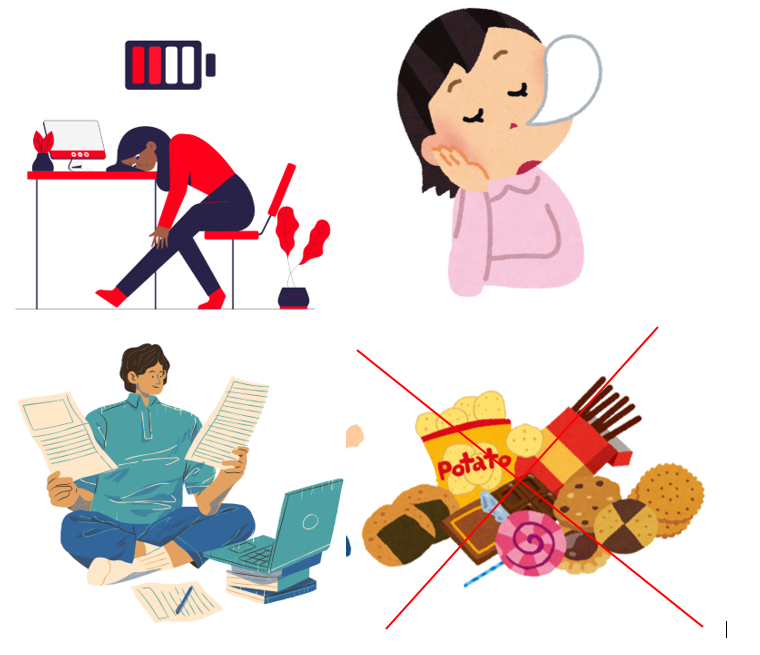

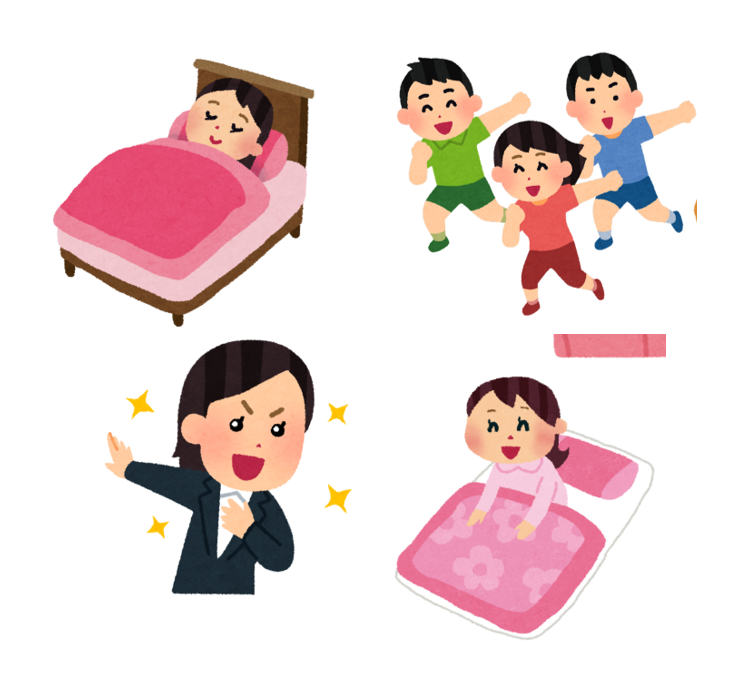

Storytelling With Data: Provide the updated user stories after performing data exploration, incorporating real-world data insights.Include relevant visualizations that were used to refine the stories.

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Sleep_health_and_lifestyle_dataset.csv to Sleep_health_and_lifestyle_dataset.csv


In [ ]:
import pandas as pd

df=pd.read_csv("Sleep_health_and_lifestyle_dataset.csv")
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


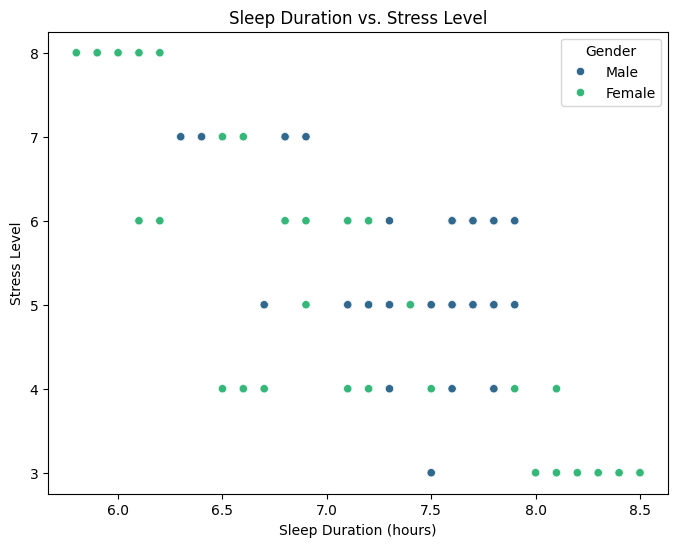

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(8, 6))
sns.scatterplot(x='Sleep Duration', y='Stress Level', data=df, hue='Gender', palette='viridis')
plt.title('Sleep Duration vs. Stress Level')
plt.xlabel('Sleep Duration (hours)')
plt.ylabel('Stress Level')
plt.show()


<ipython-input-21-9bdbc4887529>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Gender', y='Sleep Duration', data=df, palette='rocket')


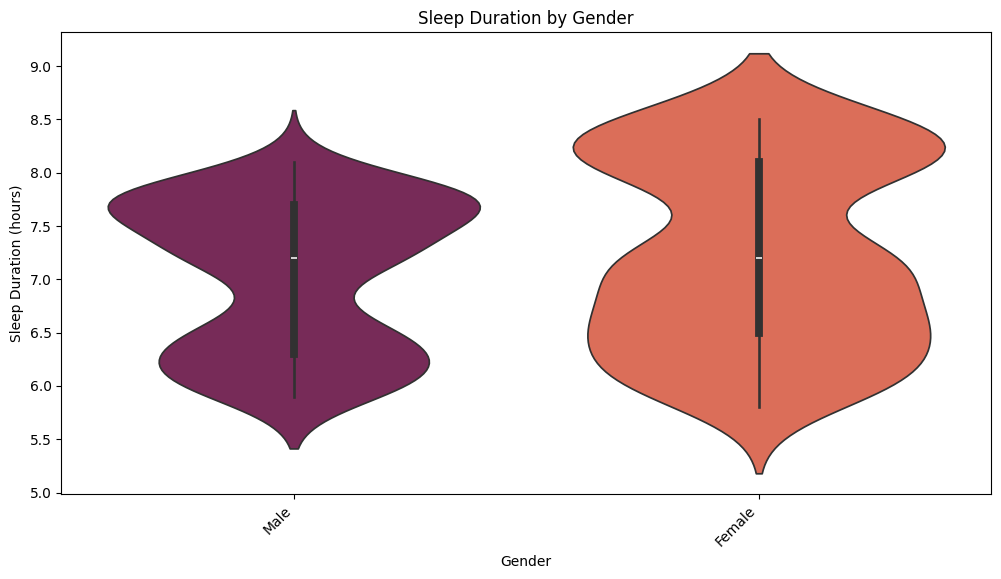

In [ ]:
plt.figure(figsize=(12, 6))
sns.violinplot(x='Gender', y='Sleep Duration', data=df, palette='rocket')
plt.title('Sleep Duration by Gender')
plt.xlabel('Gender')
plt.ylabel('Sleep Duration (hours)')
plt.xticks(rotation=45, ha='right')
plt.show()

<ipython-input-34-04e41db7991a>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(x=df['Gender'], y=df['Stress Level'], data=df, palette='viridis')


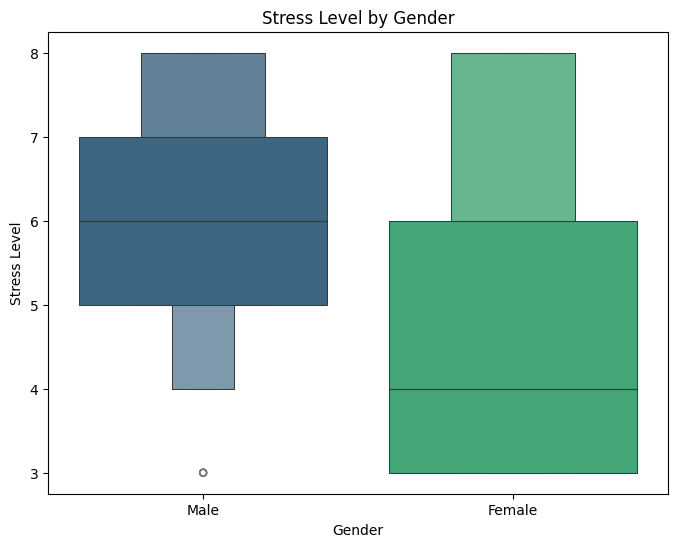

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxenplot(x=df['Gender'], y=df['Stress Level'], data=df, palette='viridis')
plt.title('Stress Level by Gender')
plt.xlabel('Gender')
plt.ylabel('Stress Level')
plt.show()

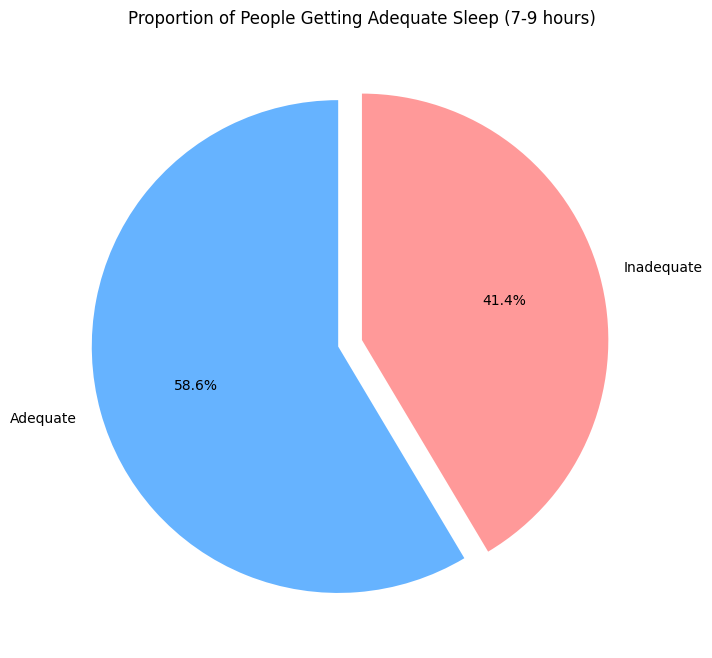

In [ ]:
df['adequate_sleep'] = df['Sleep Duration'].apply(lambda x: 'Adequate' if 7 <= x <= 9 else 'Inadequate')

sleep_proportion = df['adequate_sleep'].value_counts()

plt.figure(figsize=(8, 8))
sleep_proportion.plot.pie(autopct='%1.1f%%', colors=['#66b3ff', '#ff9999'], startangle=90, explode=[0.1, 0])
plt.title('Proportion of People Getting Adequate Sleep (7-9 hours)')
plt.ylabel('')
plt.show()

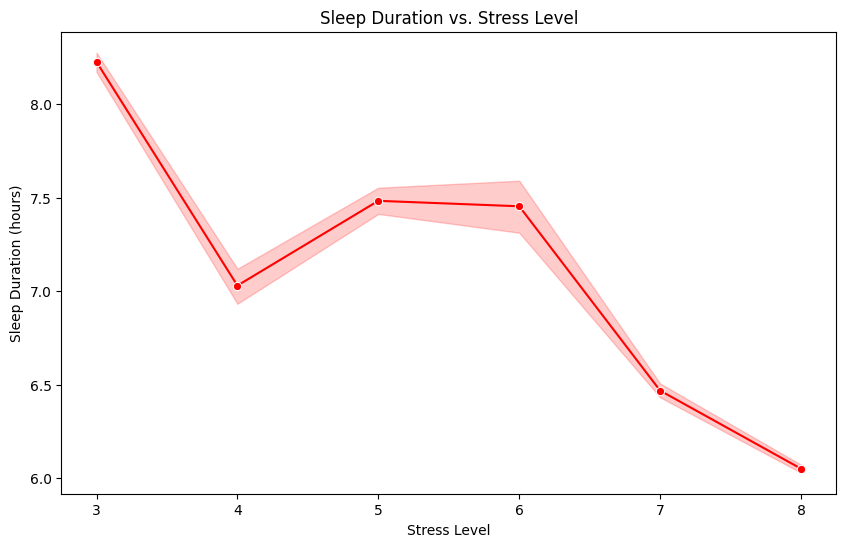

In [ ]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='Stress Level', y='Sleep Duration', data=df, color='red', marker='o')
plt.title('Sleep Duration vs. Stress Level')
plt.xlabel('Stress Level')
plt.ylabel('Sleep Duration (hours)')
plt.show()

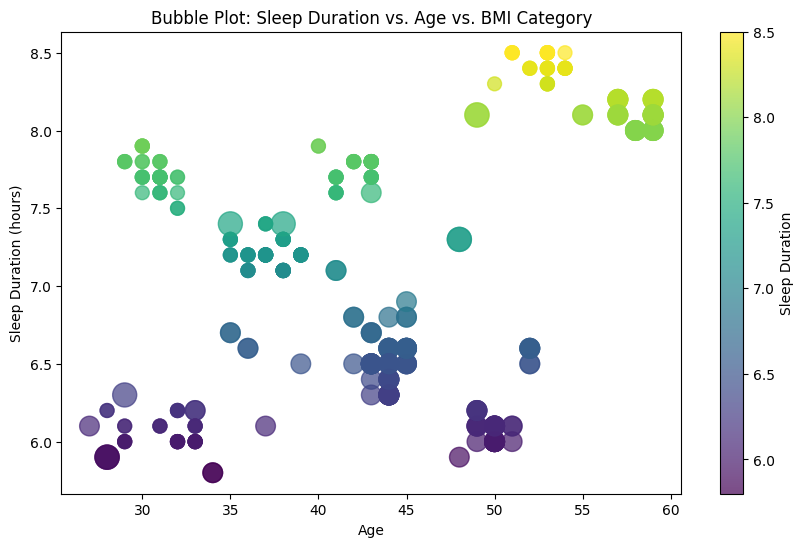

In [ ]:
# Map BMI categories to sizes for bubbles
bmi_size_map = {'Normal': 100, 'Overweight': 200, 'Obese': 300}
df['bmi_size'] = df['BMI Category'].map(bmi_size_map)

plt.figure(figsize=(10, 6))
plt.scatter(df['Age'], df['Sleep Duration'], s=df['bmi_size'], c=df['Sleep Duration'], cmap='viridis', alpha=0.7)
plt.title('Bubble Plot: Sleep Duration vs. Age vs. BMI Category')
plt.xlabel('Age')
plt.ylabel('Sleep Duration (hours)')
plt.colorbar(label='Sleep Duration')
plt.show()


<function matplotlib.pyplot.title(label: 'str', fontdict: 'dict[str, Any] | None' = None, loc: "Literal['left', 'center', 'right'] | None" = None, pad: 'float | None' = None, *, y: 'float | None' = None, **kwargs) -> 'Text'>

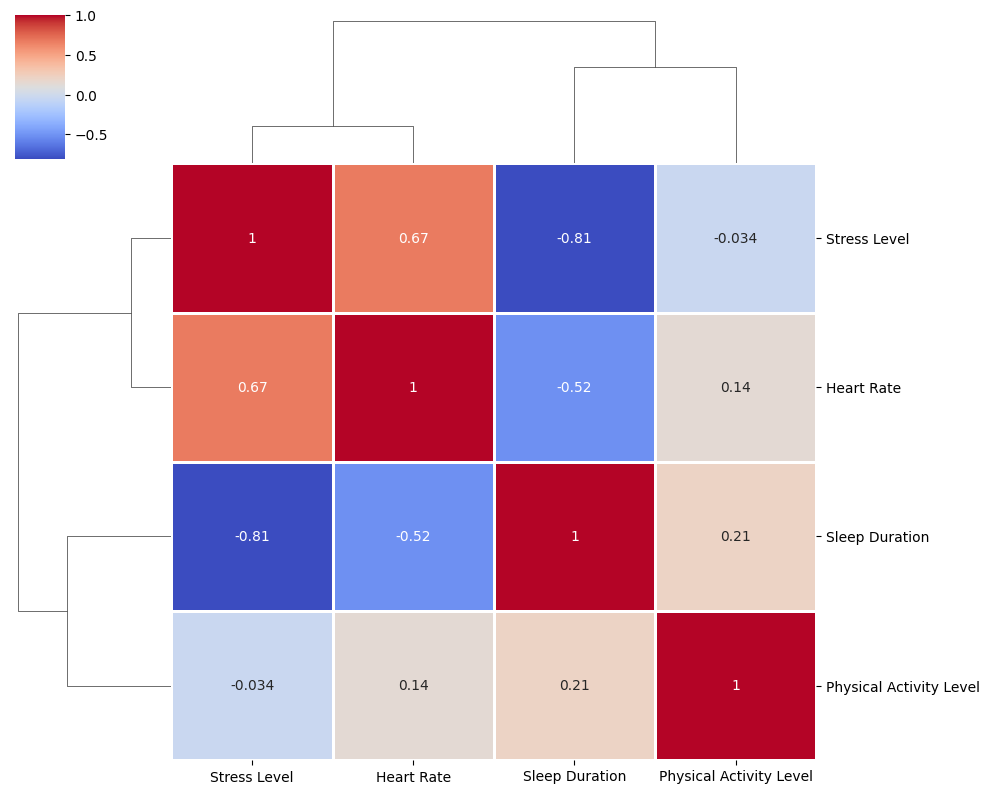

In [ ]:
sns.clustermap(df[['Sleep Duration', 'Stress Level', 'Physical Activity Level', 'Heart Rate']].corr(), annot=True, cmap='coolwarm', figsize=(10, 8), linewidths=1)
plt.title

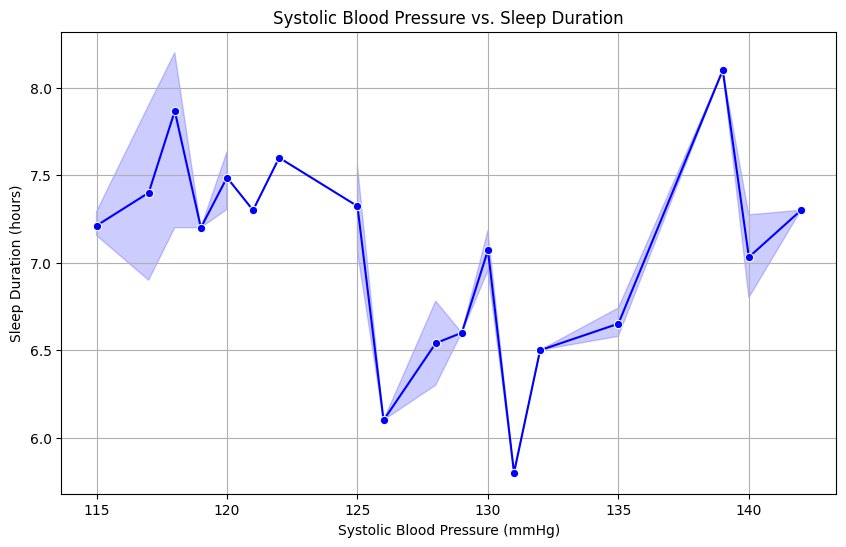

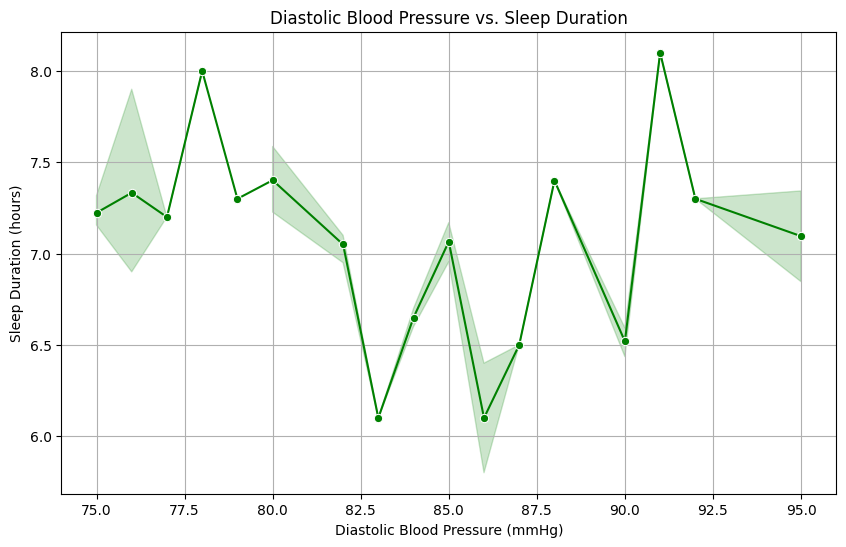

In [ ]:
# Split 'Blood Pressure' column into systolic and diastolic
df[['systolic', 'diastolic']] = df['Blood Pressure'].str.split('/', expand=True)
df['systolic'] = df['systolic'].astype(int)
df['diastolic'] = df['diastolic'].astype(int)

# Line plot for systolic vs. sleep duration
plt.figure(figsize=(10, 6))
sns.lineplot(x='systolic', y='Sleep Duration', data=df, marker='o', color='b')
plt.title('Systolic Blood Pressure vs. Sleep Duration')
plt.xlabel('Systolic Blood Pressure (mmHg)')
plt.ylabel('Sleep Duration (hours)')
plt.grid(True)
plt.show()

# Line plot for diastolic vs. sleep duration
plt.figure(figsize=(10, 6))
sns.lineplot(x='diastolic', y='Sleep Duration', data=df, marker='o', color='g')
plt.title('Diastolic Blood Pressure vs. Sleep Duration')
plt.xlabel('Diastolic Blood Pressure (mmHg)')
plt.ylabel('Sleep Duration (hours)')
plt.grid(True)
plt.show()


Based on the line plots, it appears that **higher stress levels** and **lower physical activity** are associated with **shorter sleep duration**, while **heart rate** and **blood pressure** show varying trends across individuals with different sleep durations. These insights suggest that lifestyle factors, such as stress and activity level, significantly impact sleep health.

Comparison Summary: A brief (1-2 paragraph) comparison of the stories before and after incorporating data, highlighting key changes in approach and understanding.

Before we incorporated the data, we used images found on the internet to illustrate the impact that healthy sleep can have on one's life. After incorporating the data, we began utilizing the information uploaded by survey participants to create our own graphs, which helped present our message in a more statistical manner.

Now that we have the data, we can provide more conclusive evidence, making it easier to persuade people to prioritize sleep. The negative correlations between the amount of sleep and factors such as stress levels, blood pressure, and heart rate provide compelling reasons for people to adopt a more balanced lifestyle. These findings emphasize the importance of sleep in maintaining both physical and mental well-being, encouraging individuals to recognize sleep as a key component of their overall health.